In [5]:
import sys
sys.path.append('../../')

In [6]:

from config.constants import *
from backtesting import Backtest, Strategy
from backtesting.test import EURUSD 
from backtesting.lib import plot_heatmaps, resample_apply
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from util.ATR import *
from util.SMA import *
from util.plot_return import *
from util.RSI import *
from util.LongBarSmallWick import *


In [3]:
XAUUSD = {}
XAUUSD['D1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['D1'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['H4'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['H4'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['H1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['H1'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M30'] = pd.read_csv(
    PATH_DATA + SYMBOL['XAUUSD']['M30'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M15'] = pd.read_csv(
    PATH_DATA + SYMBOL['XAUUSD']['M15'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M5'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['M5'] + '.csv', index_col='Time', parse_dates=True)
XAUUSD['M1'] = pd.read_csv(PATH_DATA + SYMBOL['XAUUSD']
                           ['M1'] + '.csv', index_col='Time', parse_dates=True)

In [4]:
XAUUSD['H4']

,Open,High,Low,Close,Volume
Time,,,,,
2007-01-01 00:00:00,635.679,636.194,635.009,635.497,95
2007-01-01 04:00:00,635.336,636.220,635.254,635.699,97
2007-01-01 08:00:00,635.780,636.225,635.201,635.993,99
2007-01-01 12:00:00,636.053,636.189,635.117,636.006,90
2007-01-01 16:00:00,635.902,636.185,635.006,635.989,96
...,...,...,...,...,...
2023-03-10 00:00:00,1831.428,1834.765,1827.974,1829.085,240
2023-03-10 04:00:00,1829.085,1834.575,1827.675,1833.405,240
2023-03-10 08:00:00,1833.415,1837.245,1830.778,1834.865,240


In [7]:
class Long_Bar_Small_Wicks(Strategy) :
    ATR_SL = 0.5
    def init(self):
        self.data.df['ATR'] = ATR(self.data.df, 20)['ATR']
        self.data.df['average_bar'] = average_bar_size(self.data.df)['average_bar']
        self.data.df['small_wick'] = small_wick(self.data.df, 0.2)['small_wick']
    def next(self):
        
        current_ATR = self.data.df.loc[self.data.df.index[-1], 'ATR']

        if (self.data.df['High'][-2] - self.data.df['Low'][-2]) >= 4 * self.data.df['average_bar'][-2] and self.data.df['small_wick'][-2] == True \
                and self.data.df['Close'][-2] > self.data.df['Open'][-2] and not self.position:
            tp = self.data.Close + current_ATR * self.ATR_SL * 4
            sl = self.data.Close - current_ATR * self.ATR_SL
            # Place your buy logic here
            self.buy(sl=sl, tp=tp, size=1)

        if (self.data.df['High'][-2] - self.data.df['Low'][-2]) >= 4 * self.data.df['average_bar'][-2] and self.data.df['small_wick'][-2] == True \
                and self.data.df['Close'][-2] < self.data.df['Open'][-2] and not self.position:
            tp = self.data.Close - current_ATR * self.ATR_SL * 4
            sl = self.data.Close + current_ATR * self.ATR_SL
               
            self.sell(sl=sl, tp=tp, size=1)

In [8]:
account_size = 20000

In [9]:
bt = Backtest(XAUUSD['H4'], Long_Bar_Small_Wicks , cash=account_size, margin=1/2000, )
result = bt.run()
result

Start                     2007-01-01 00:00:00
End                       2023-03-10 16:00:00
Duration                   5912 days 16:00:00
Exposure Time [%]                    0.642901
Equity Final [$]                 19981.535075
Equity Peak [$]                    20036.6572
Return [%]                          -0.092325
Buy & Hold Return [%]              193.329158
Return (Ann.) [%]                   -0.004616
Volatility (Ann.) [%]                0.060314
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.275106
Avg. Drawdown [%]                   -0.080809
Max. Drawdown Duration     2870 days 04:00:00
Avg. Drawdown Duration      639 days 09:00:00
# Trades                                   49
Win Rate [%]                        18.367347
Best Trade [%]                       1.803959
Worst Trade [%]                     -0.782152
Avg. Trade [%]                    

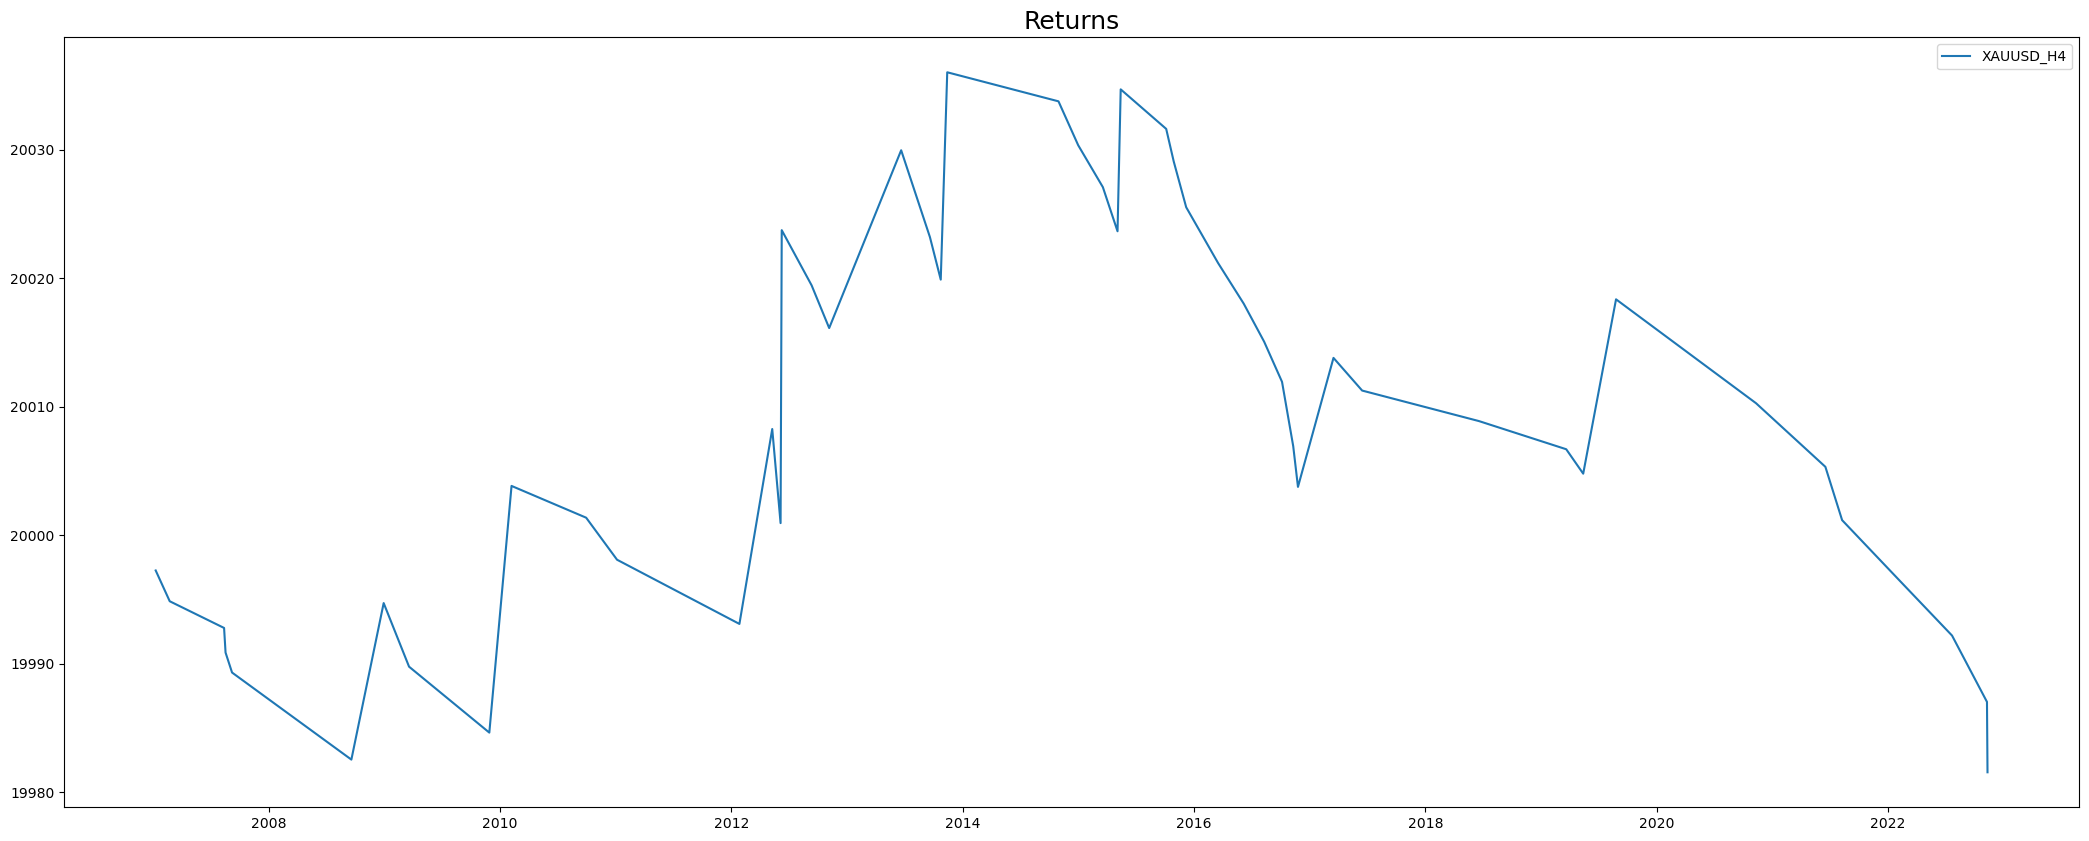

In [10]:
plot_return_trades(result['_trades'],'XAUUSD_H4' , account_size)

In [11]:
bt.plot()

Row(id='1407', ...)